In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# %matplotlib inline


In [2]:
dataset_train = pd.read_csv('/Users/vision8/Desktop/ML/Housing Price Kaggle/dataset/train.csv')
dataset_test = pd.read_csv('/Users/vision8/Desktop/ML/Housing Price Kaggle/dataset/test.csv')

dataset_train.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
dataset_train.shape

(1460, 81)

In [4]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We have total 1460 rows and 81 columns, out of which some are integer, float type, and object. Now we count the number of columns, that are object type, integer type and float type.



In [5]:
def column_type(dataset):
    """Function to count the number of columns by data type in a ds."""
    
    # Counting object type columns
    obj = dataset.dtypes == 'object'
    obj_columns = list(dataset.columns[obj])
    print("Categorical Variables:", len(obj_columns))

    # Counting integer type columns
    int_type = dataset.dtypes == 'int64'
    int_columns = list(dataset.columns[int_type])
    print("Integer Variables:", len(int_columns))

    # Counting float type columns
    fl = dataset.dtypes == 'float64'
    fl_columns = list(dataset.columns[fl])
    print("Float Variables:", len(fl_columns))

    # Checking for any NA values in the dataset
    has_na = dataset.isnull().values.any()
    print(f"Containing NA values: {has_na}")



In [6]:
column_type(dataset_train)

Categorical Variables: 43
Integer Variables: 35
Float Variables: 3
Containing NA values: True


We have above amount of columns type, our goal is to predict the saleprice of the housing in the dataset. Let's see how is the column saleprice looks like.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/var/folders/2g/61fl45214_z3_52h2txgqbrh0000gn/T/ipykernel_82603/3786776341.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_train['SalePrice'], color = 'g', bins = 100)


<Axes: xlabel='SalePrice', ylabel='Density'>

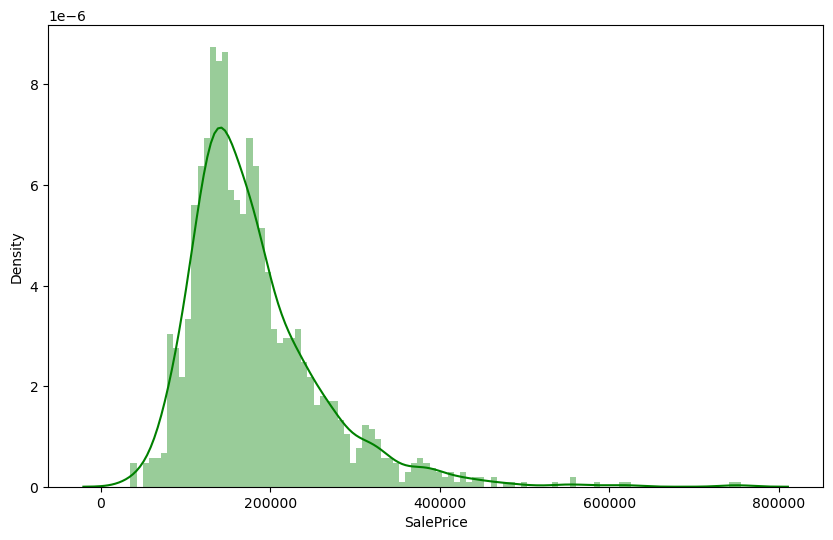

In [7]:
print(dataset_train['SalePrice'].describe())
plt.figure(figsize=(10,6))
sns.distplot(dataset_train['SalePrice'], color = 'g', bins = 100)

In [8]:
dataset_train_num = dataset_train.select_dtypes(exclude = 'object')
dataset_train_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

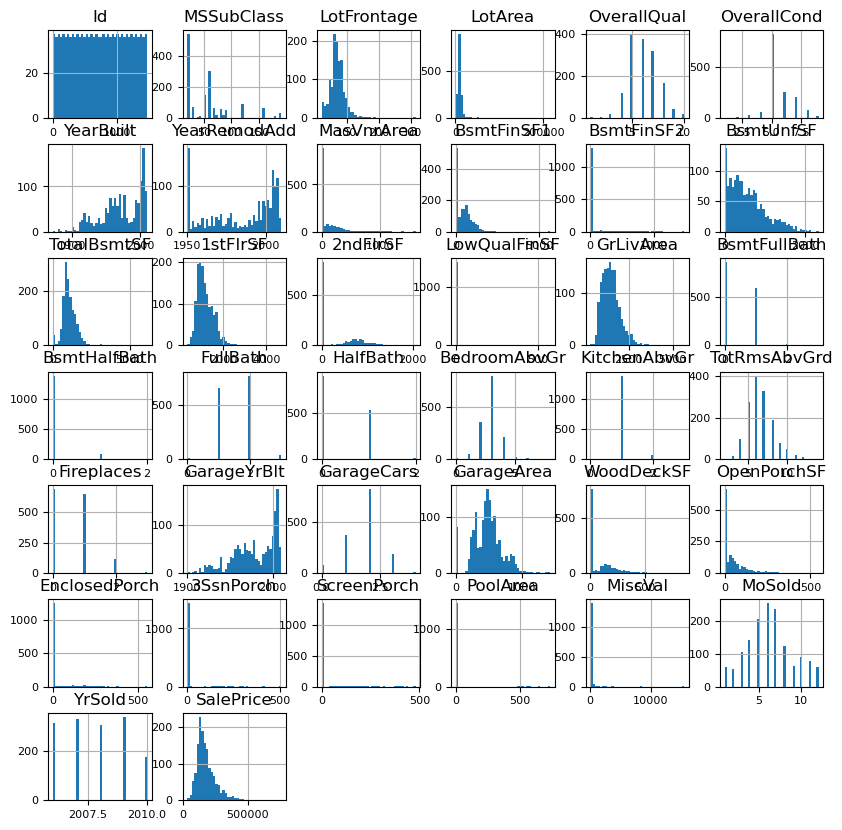

In [9]:
dataset_train_num.hist(figsize = (10,10), bins = 40, xlabelsize= 8, ylabelsize=8)

In [10]:
def list_categorical_columns(dataset):
    """Function to list the categorical columns in a dataset."""
    obj = dataset.dtypes == 'object'
    obj_columns = list(dataset.columns[obj])  # List of categorical columns
    return obj_columns

def replacing_na_values_with_numerical_values(dataset):
    """Function to replace the NA values with numerical values in a dataset."""
    dataset_copy = dataset.copy()
    #Labeling categories into numerical values
    dataset_copy['Alley'] = dataset_copy['Alley'].fillna('Na').map({'Grvl': 1, 'Pave': 2, 'Na': 3})
    dataset_copy['BsmtQual'] = dataset_copy['BsmtQual'].fillna('Na').map({'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa' : 4, 'Po': 5, 'NA': 6})
    dataset_copy['BsmtExposure'] = dataset_copy['BsmtExposure'].fillna('NA').map({'Gd': 1, 'Av': 2, 'Mn': 3, 'No': 4, 'NA': 5})
    dataset_copy['BsmtFinType1'] = dataset_copy['BsmtFinType1'].fillna('NA').map({'GLQ': 1, 'ALQ': 2, 'BLQ': 3, 'Rec': 4, 'LwQ': 5, 'Unf': 6, 'NA': 7})
    dataset_copy['BsmtFinType2'] = dataset_copy['BsmtFinType2'].fillna('NA').map({'GLQ': 1, 'ALQ': 2, 'BLQ': 3, 'Rec': 4, 'LwQ': 5, 'Unf': 6, 'NA': 7})
    dataset_copy['FireplaceQu'] = dataset_copy['FireplaceQu'].fillna('NA').map({'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5, 'NA': 6})
    dataset_copy['GarageType'] = dataset_copy['GarageType'].fillna('NA').map({'2Types': 1, 'Attchd': 2, 'Basment': 3, 'BuiltIn': 4, 'CarPort': 5, 'Detchd': 6, 'NA': 7})
    dataset_copy['GarageFinish'] = dataset_copy['GarageFinish'].fillna('NA').map({'Fin': 1, 'RFn': 2, 'Unf': 3, 'NA': 4})
    dataset_copy['GarageQual'] = dataset_copy['GarageQual'].fillna('NA').map({'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5, 'NA': 6})
    dataset_copy['GarageCond'] = dataset_copy['GarageCond'].fillna('NA').map({'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5, 'NA': 6})
    dataset_copy['PoolQC'] = dataset_copy['PoolQC'].fillna('NA').map({'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'NA': 5})
    dataset_copy['Fence'] = dataset_copy['Fence'].fillna('NA').map({'GdPrv': 1, 'MnPrv': 2, 'GdWo': 3, 'MnWw': 4, 'NA': 5})
    dataset_copy['MiscFeature'] = dataset_copy['MiscFeature'].fillna('NA').map({'Elev': 1, 'Gar2': 2, 'Othr': 3, 'Shed': 4, 'TenC': 5, 'NA': 6})
    dataset_copy['CentralAir'] = dataset_copy['CentralAir'].fillna('N').map({'N': 0, 'Y': 1})

    #Converting Categorical into Numerical
    obj_columns = list_categorical_columns(dataset_copy)
    le = LabelEncoder()
    for col in obj_columns:
        dataset_copy[col] = le.fit_transform(dataset_copy[col])

    #Filling remaining values with 0
    for col in dataset_copy.columns:
        i_check = dataset_copy[col].isnull().values.any()
        if i_check == True:
            dataset_copy[col] = dataset_copy[col].fillna(0)

    return dataset_copy

def drop_untrainable_columns(dataset):
    """Function to drop untrainable columns in a dataset."""
    dataset_copy = dataset.copy()
    dataset_copy = dataset_copy.drop(['Alley', 'Street', 'PoolQC'], axis = 1)

    return dataset_copy

    

---> Preprocessing <---


In [11]:
dataset_train_new = replacing_na_values_with_numerical_values(dataset_train)
dataset_test_new = replacing_na_values_with_numerical_values(dataset_test)

dataset_train_new = drop_untrainable_columns(dataset_train_new)
dataset_test_new = drop_untrainable_columns(dataset_test_new)

submission_id = dataset_test_new['Id']

In [12]:
column_type(dataset_train_new)

Categorical Variables: 0
Integer Variables: 74
Float Variables: 4
Containing NA values: False


Removed all the categorical values, and replaced NA values with 0.

In [13]:
dataset_train_new.drop(['Id'], axis = 1, inplace = True)
dataset_test_new.drop(['Id'], axis = 1, inplace = True)

In [14]:
dataset_train_new.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,3,3,0,4,0,5,...,0,0,5,6,0,2,2008,8,4,208500
1,20,3,80.0,9600,3,3,0,2,0,24,...,0,0,5,6,0,5,2007,8,4,181500
2,60,3,68.0,11250,0,3,0,4,0,5,...,0,0,5,6,0,9,2008,8,4,223500
3,70,3,60.0,9550,0,3,0,0,0,6,...,0,0,5,6,0,2,2006,8,0,140000
4,60,3,84.0,14260,0,3,0,2,0,15,...,0,0,5,6,0,12,2008,8,4,250000


array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'MSZoning'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'LotShape'}>,
        <Axes: title={'center': 'LandContour'}>,
        <Axes: title={'center': 'Utilities'}>,
        <Axes: title={'center': 'LotConfig'}>,
        <Axes: title={'center': 'LandSlope'}>],
       [<Axes: title={'center': 'Neighborhood'}>,
        <Axes: title={'center': 'Condition1'}>,
        <Axes: title={'center': 'Condition2'}>,
        <Axes: title={'center': 'BldgType'}>,
        <Axes: title={'center': 'HouseStyle'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>],
       [<Axes: title={'center': 'RoofStyle'}>,
        <Axes: title={'center': 'RoofMatl'}>,
        <Axes: title={'center': 'Exterior1st'}

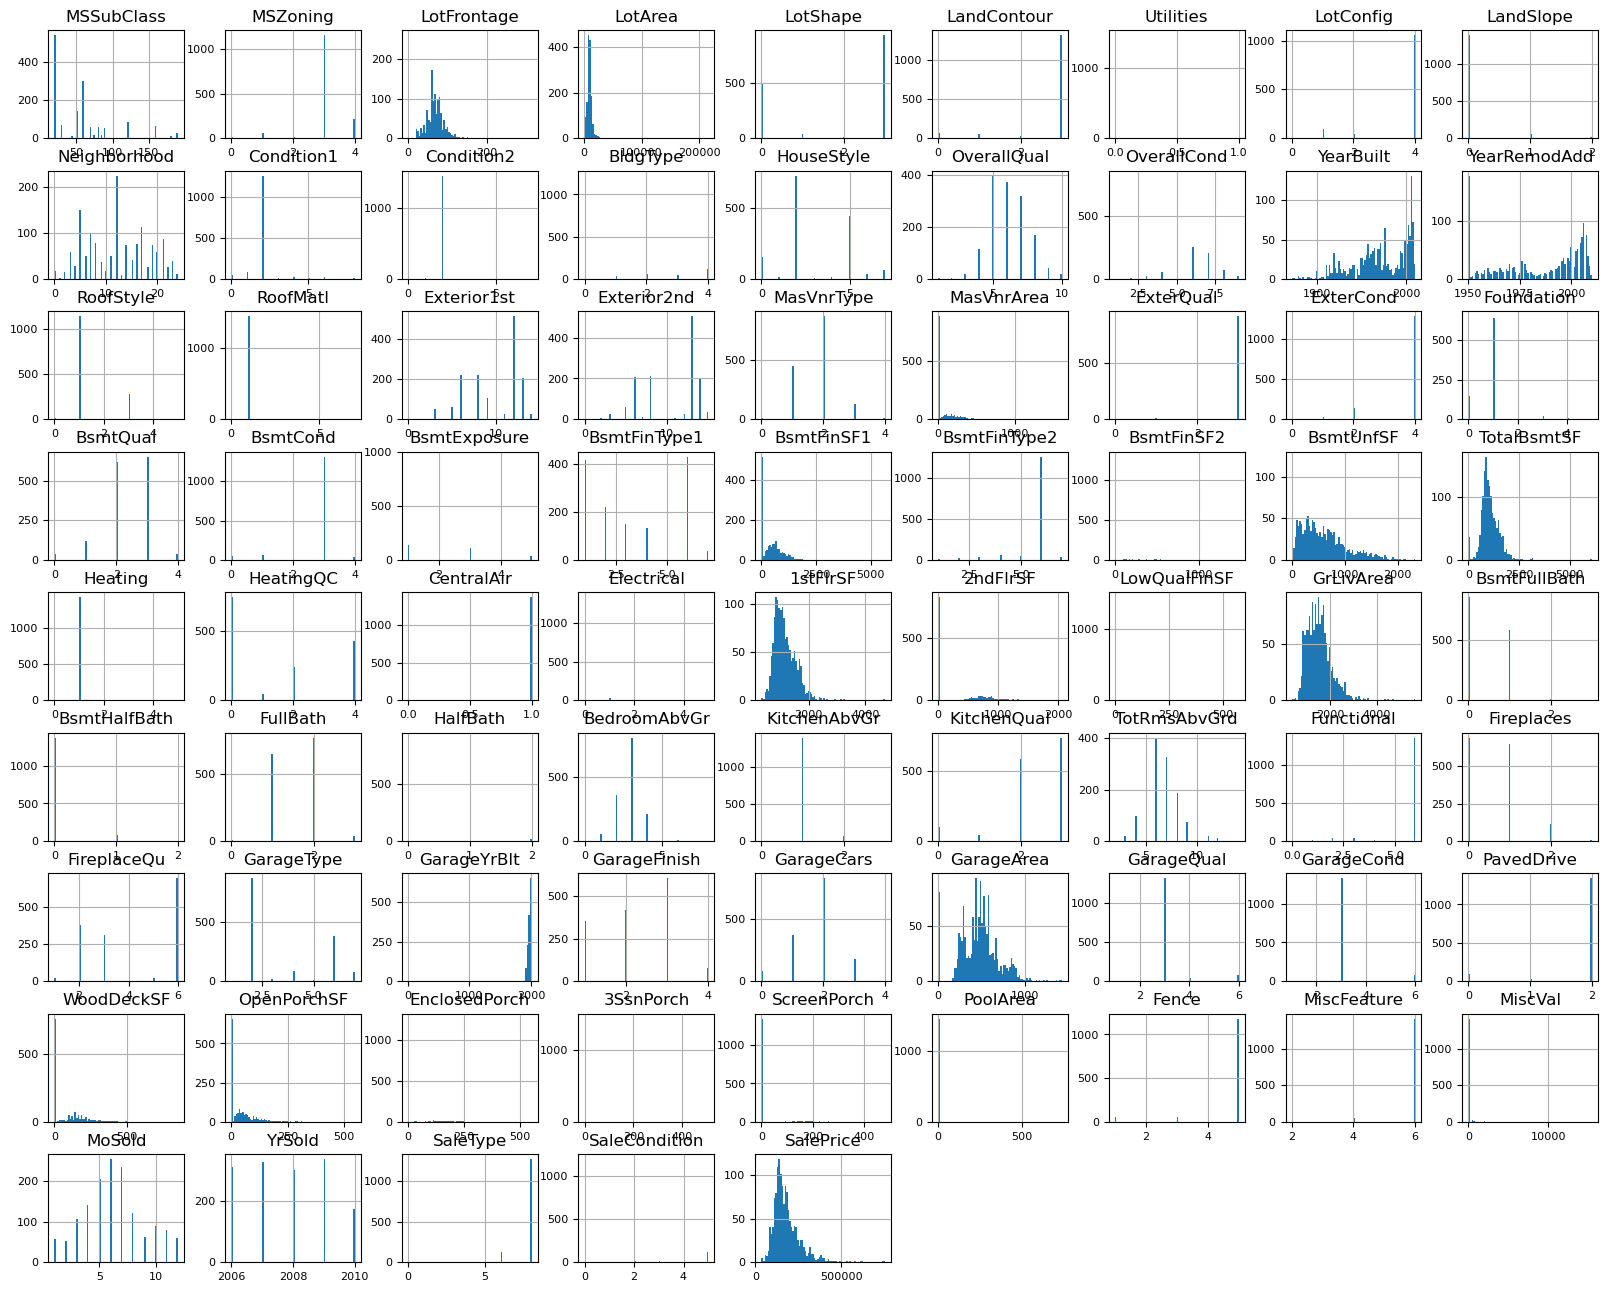

In [16]:
dataset_train_new.hist(figsize= (20,16), bins=80, xlabelsize=8, ylabelsize=8)

Now that we have preprocessed our data, let's split our data into train and test sets.


In [58]:
X = dataset_train_new.drop(['SalePrice'], axis = 1)
Y = dataset_train_new['SalePrice']

#Scale both train and test sets
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
dataset_test_new = scaler.fit_transform(dataset_test_new)

Y_scaled = scaler.fit_transform(Y.values.reshape(-1, 1))


X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size = 0.2, random_state = 20)

In [64]:
X_test.shape

(292, 76)

Now that we have split the data into training and test sets, it is time to train a classifier on the training set. The goal of classification is to assign each instance in the dataset to one out of several classes (or categories).


In [75]:
def loss_mse(target_y, predicted_y):
    return tf.reduce_mean(tf.square(target_y - predicted_y))


class Layer(tf.Module):
    def __init__(self, input_size, output_size, activation = tf.nn.relu, **kwargs):
        super().__init__(**kwargs)
        self.w = tf.Variable(tf.random.uniform(shape = (input_size, output_size), minval = -0.01, maxval=0.01))
        self.b = tf.Variable(tf.zeros(output_size))
        self.input_size = input_size
        self.output_size = output_size
        self.activation = activation


    def __call__(self, x):
        return self.activation(tf.matmul(tf.cast(x, self.w.dtype), self.w) + self.b)
    

class NeuralNetwork(tf.Module):
    def __init__(self, layers, **kwargs):
        super().__init__(**kwargs)
        self.layers = layers

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate = 0.01)

def train_neural_network(neural_network, x, y):
    with tf.GradientTape(persistent=True) as tape:
        y_train_pred = neural_network(x)
        current_loss = loss_mse(y, y_train_pred)

    gradients = tape.gradient(current_loss, neural_network.trainable_variables)
    optimizer.apply_gradients(zip(gradients, neural_network.trainable_variables))
    return current_loss



layers = [
    Layer(76, X_train.shape[1] * 8),  # Adjusted from 76 to 10 to match the input features
    Layer(X_train.shape[1] * 8, X_train.shape[1] * 4),
    Layer(X_train.shape[1] * 4, X_train.shape[1] * 2),
    Layer(X_train.shape[1] * 2, X_train.shape[1]),
    Layer(X_train.shape[1], 1, activation=tf.identity)
]

nn = NeuralNetwork(layers)

for i_epochs in range(50):
    train_loss = train_neural_network(nn, X_train, Y_train)
    print("Training loss in epoch {0} = {1}.".format(i_epochs, train_loss))
print(f"Final loss : ",(loss_mse(Y_test, nn(X_test))).numpy())


Training loss in epoch 0 = 0.05275406688451767.
Training loss in epoch 1 = 0.05113467201590538.
Training loss in epoch 2 = 0.04957951232790947.
Training loss in epoch 3 = 0.04808588698506355.
Training loss in epoch 4 = 0.046651434153318405.
Training loss in epoch 5 = 0.04527384415268898.
Training loss in epoch 6 = 0.043950844556093216.
Training loss in epoch 7 = 0.0426802784204483.
Training loss in epoch 8 = 0.041460081934928894.
Training loss in epoch 9 = 0.04028824716806412.
Training loss in epoch 10 = 0.039162859320640564.
Training loss in epoch 11 = 0.0380820706486702.
Training loss in epoch 12 = 0.03704412654042244.
Training loss in epoch 13 = 0.036047324538230896.
Training loss in epoch 14 = 0.03509002923965454.
Training loss in epoch 15 = 0.03417068347334862.
Training loss in epoch 16 = 0.03328776732087135.
Training loss in epoch 17 = 0.03243985399603844.
Training loss in epoch 18 = 0.031625546514987946.
Training loss in epoch 19 = 0.03084351308643818.
Training loss in epoch 20 

In [76]:
Y_test_predict = nn(X_test)

print(loss_mse(Y_test, Y_test_predict))

tf.Tensor(0.019113297, shape=(), dtype=float32)


In [77]:
dataset_test_predict = nn(dataset_test_new)
dataset_test_predict = scaler.inverse_transform(dataset_test_predict)
dataset_test_predict

array([[127503.26214284],
       [127503.25141251],
       [127503.34798545],
       ...,
       [127503.51967067],
       [127503.34798545],
       [127503.43382806]])

In [78]:
df_submission = pd.DataFrame()
df_submission['Id'] = submission_id
df_submission['SalePrice'] = dataset_test_predict
df_submission.to_csv('submission.csv', index=False)